# Exercício de análise Exploratória

# 1. Usando os dados dessa base de dados, você irá:

### a. Importe os dados em notebook e atribua à variável chipo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr

In [ ]:

chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### b. Selecione e mostre as 10 primeiras entrada

In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
chipo.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### c. Quantas observações estão presentes neste DataSet?


In [ ]:
#len(chipo)
chipo.shape[0]

4622

### d. Qual o número de colunas neste DataSet?

In [ ]:
chipo.shape[1]
# chipo.info()
#len(chipo.columns)

5

### e. Qual o nome de todas as colunas deste DataSet?

In [ ]:
#chipo.columns
chipo.keys()

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### f. Qual o produto mais pedido? Quantas vezes ele foi pedido?

In [ ]:
len(chipo['item_name'].unique())

50

In [ ]:
produto_mais_pedido = chipo.groupby('item_name').quantity.sum()
id_produto = produto_mais_pedido.idxmax()
produto = produto_mais_pedido.max()
print(f'{id_produto} {produto}')


Chicken Bowl 761


In [ ]:
print

<function print>

### g. Qual foi o pedido mais pedido dentro da coluna choice_description

In [ ]:
pedido_choice = chipo.groupby('choice_description').quantity.sum()
id_pedido= pedido_choice.idxmax()
pedido = pedido_choice.max()
print(f'{id_pedido} {pedido}')

[Diet Coke] 159


### h. Quantos itens foram pedidos no total?

In [ ]:
chipo.quantity.sum()

4972

### i. Qual foi o valor recebido para o período representado nessa base de dados?

In [ ]:
chipo_sem_sinal = chipo.item_price.str.replace('$','')
chipofloat = chipo_sem_sinal.astype(float)
chipofloat.sum()


/tmp/ipykernel_76/3445559792.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  chipo_sem_sinal = chipo.item_price.str.replace('$','')


34500.16

### j. Qual a média do valor recebido por pedido?

In [ ]:
chipo = chipo.drop('item_price', axis =1)
chipo['item_price_f'] = chipofloat
chipo


,order_id,quantity,item_name,choice_description,item_price_f
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [ ]:
media = chipo.groupby('order_id').item_price_f.sum().mean()
print(f'{media:.2f}')



18.81


### k. Quantos itens diferentes estão esgotados?

In [ ]:
# chipo.groupby('item_name').choice_description.sum()

### l. Quantos produtos custam mais de $10?

In [ ]:
chipo['unidade'] = chipo['item_price_f'] / chipo['quantity']
caros = (chipo['unidade'] > 10).sum()
caros


1034

### m. Qual o preço para cada um deles?

In [ ]:
chipo_preco_maior_10 = chipo[chipo['unidade'] > 10][['item_name','unidade']]
chipo_preco_maior_10

,item_name,unidade
5,Chicken Bowl,10.98
7,Steak Burrito,11.75
13,Chicken Bowl,11.25
23,Chicken Burrito,10.98
39,Barbacoa Bowl,11.75
...,...,...
4610,Steak Burrito,11.75
4611,Veggie Burrito,11.25
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75


### n. Ordene os itens que custam mais de $10 por ordem alfabética.

In [ ]:
chipo_preco_maior_10.sort_values(by='item_name')

# ordem_alfabetica = chipo_preco_maior_10.sort_values('item_name',ascending=True)
# ordem_alfabetica

,item_name,unidade
1175,Barbacoa Bowl,11.48
2013,Barbacoa Bowl,11.75
2073,Barbacoa Bowl,11.75
4485,Barbacoa Bowl,11.75
471,Barbacoa Bowl,11.48
...,...,...
1884,Veggie Salad Bowl,11.25
4261,Veggie Salad Bowl,11.25
295,Veggie Salad Bowl,11.25
738,Veggie Soft Tacos,11.25


### o. Quantas vezes o item mais caro foi pedido?

In [ ]:
mais_caro = chipo[chipo['unidade'] == chipo['unidade'].max()].sum()
mais_caro['quantity']

30

### p. Quantas vezes uma Veggie Salad Bowl foi pedida?

In [ ]:
chipo['item_name'].value_counts()['Veggie Salad Bowl']

18

### q. Crie um histograma com os 5 produtos mais pedidos.

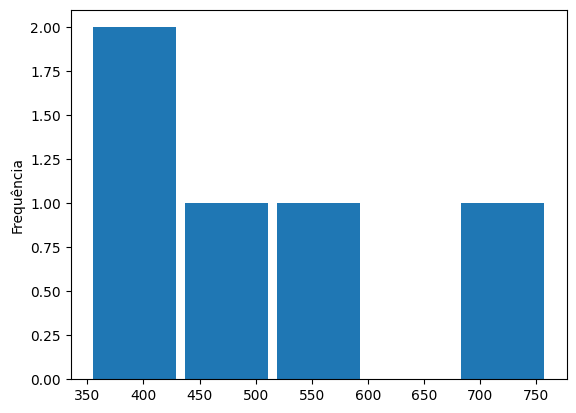

In [ ]:
mais_pedidos = chipo.groupby('item_name').quantity.sum().sort_values(ascending = False)
mais_pedidos5 = mais_pedidos[:5]
plt.hist(mais_pedidos5, 5, rwidth = 0.9)
plt.ylabel('Frequência')
plt.show()



In [ ]:
#GRAFICO EM BARRA
#plt.figure(figsize=(12,6))
#mais_pedidos5.plot.bar(color='blue')
#plt.xlabel('Produto',fontsize=12)
#plt.ylabel('Quantidade de Pedidos',fontsize=12)
#plt.xticks(rotation=35,ha='right')
#plt.show()

### r. Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.

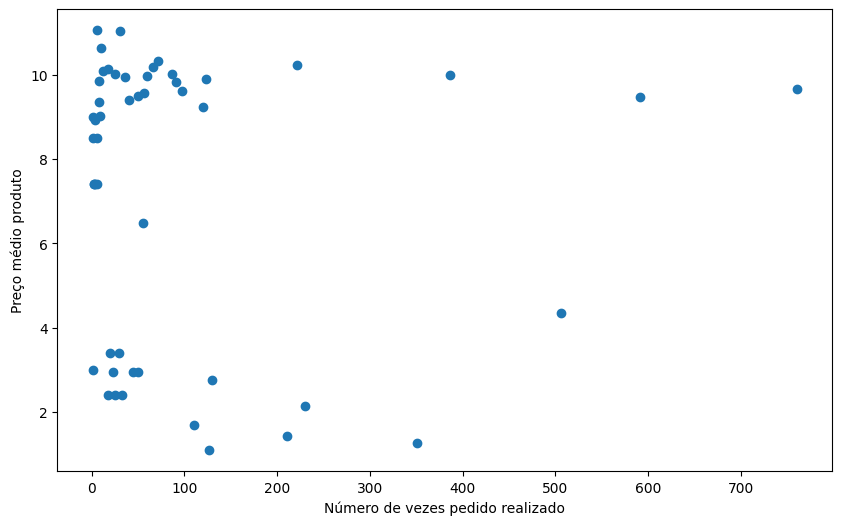

In [ ]:
preco_medio_item = chipo.groupby('item_name').unidade.mean()
plt.figure(figsize=(10,6))
plt.scatter(produto_mais_pedido,preco_medio_item)
plt.xlabel('Número de vezes pedido realizado')
plt.ylabel('Preço médio produto')
plt.show()

### s. Baseado no gráfico gerado, os dois eixos estão correlacionados? Justifique.

In [ ]:
coef_pearson = pearsonr(produto_mais_pedido,preco_medio_item)[0]
coef_pearson


-0.046446532312886826

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7732640e-2b65-4af6-91b7-f9b902211bbf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>